In [1]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=d0c3ccd2824cc65ad8e16f1ff2912f012e034585ffdc2639eee78caff7332578
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer

In [3]:
df_train = pd.read_excel("/kaggle/input/sent-nob-clean/sentnob_train.xlsx")

In [4]:
df_train.head()

,Text,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তা...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভালো লেগেছে,1
4,আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না? প...,0


In [5]:
df_train.dropna(inplace=True)

In [6]:
longest_string = max(df_train["Text"], key=len)
print(len(longest_string))

374


In [7]:
df_train['Label'].value_counts()

Label
1    5133
2    4548
0    2894
Name: count, dtype: int64

In [8]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [9]:
df_val = pd.read_excel("/kaggle/input/sent-nob-clean/sentnob_val.xlsx")

In [10]:
df_val.dropna(inplace=True)

In [11]:
df_val['Label'].value_counts()

Label
1    623
2    590
0    354
Name: count, dtype: int64

In [12]:
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [13]:
df_val['Label'].value_counts()

Label
Positive    623
Negative    590
Neutral     354
Name: count, dtype: int64

In [14]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

In [15]:
df_train['Text'] = df_train['Text'].apply(clean_text)
df_val['Text'] = df_val['Text'].apply(clean_text)

In [16]:
df_train.to_excel('test.xlsx')

In [17]:
df_train.tail(10)

,Text,Label
12565,সারা বাংলাদেশের মানুষের একটা দাবি ভুয়া লটারি...,Positive
12566,ডিসেমবরে শেষের দিকে গেলে বরফ শেষের দাদা,Neutral
12567,অনেক সুন্দর রাস্তা দিকে যা এখন পর্যন্ত দেখলাম...,Positive
12568,""" আমি বুজতে পারি না , ওরা আমাদেরকে তিস্তার পা...",Neutral
12569,জত দিন জাচ্ছে তত আপনাদের ভিডিও বের হচ্ছে দেখে...,Positive
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে ...,Positive
12571,আমার সোনার বাংলা এমন রক্ষক নামের পৌঁছানো কোনো...,Negative
12572,""" ওনারা এত এত ও এত সুন্দর পরিবেশে রান্না করে ...",Positive
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকা...,Negative
12574,বসুন্ধরা শাখার হাজি বিরিয়ানি একবারেই ফালতু,Negative


In [18]:
df_train["Label"].value_counts()

Label
Positive    5133
Negative    4548
Neutral     2894
Name: count, dtype: int64

In [19]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(df_train['Text'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00003 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
116     0.000017
117     0.000017
140     0.000028
188     0.000017
18দ     0.000028
          ...   
২২৯     0.000028
২৩      0.000028
৫০টক    0.000027
৫২      0.000014
৭৯২১    0.000028
Length: 172, dtype: float64


In [20]:
# Function to remove less important words
def remove_less_important_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)



In [21]:
df_train['Text'] = df_train['Text'].apply(remove_less_important_words)
df_val['Text'] = df_val['Text'].apply(remove_less_important_words)

In [22]:
# from sklearn.model_selection import train_test_split

# train_df, test_df = train_test_split(, test_size=0.2,stratify=df['classes'],random_state=42)


In [23]:
X_train  =  df_train['Text'].values.tolist()
y_train = df_train['Label'].tolist()

In [24]:
X_test =  df_val['Text'].values.tolist()
y_test = df_val['Label'].tolist()

In [25]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 70.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 10.7 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=f484b215c0cd6c22dac45c6fe78af7d60becf59b8b17751cf8c63f33e53505ba
  Stored in directory: /roo

In [26]:
import ktrain
from ktrain import text
MODEL_NAME = 'FacebookAI/xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [27]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 15
	95percentile : 36
	99percentile : 46


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 16
	95percentile : 36
	99percentile : 45


In [28]:
print(trn)

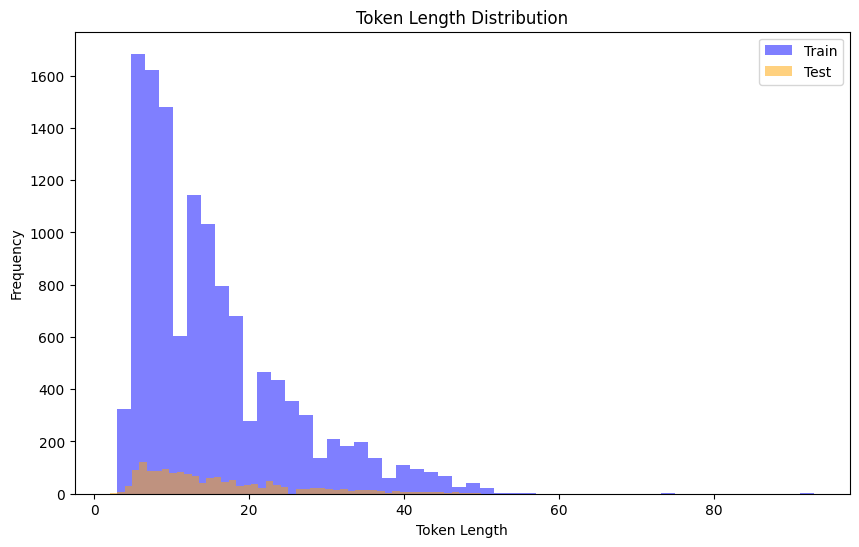

In [29]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [30]:
model = t.get_classifier()

In [31]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [32]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [33]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1572/1572 [==============================] - 976s 604ms/step - loss: 0.9496 - accuracy: 0.5481 - val_loss: 0.7926 - val_accuracy: 0.6465
Epoch 2/10
1572/1572 [==============================] - 944s 601ms/step - loss: 0.8038 - accuracy: 0.6515 - val_loss: 0.7617 - val_accuracy: 0.6726
Epoch 3/10
1572/1572 [==============================] - 944s 601ms/step - loss: 0.7258 - accuracy: 0.6883 - val_loss: 0.7246 - val_accuracy: 0.6975
Epoch 4/10
1572/1572 [==============================] - 944s 601ms/step - loss: 0.6548 - accuracy: 0.7259 - val_loss: 0.7418 - val_accuracy: 0.7058
Epoch 5/10
1572/1572 [==============================] - 944s 601ms/step - loss: 0.5973 - accuracy: 0.7500 - val_loss: 0.7716 - val_accuracy: 0.6828
Epoch 6/10
1572/1572 [==============================] - 944s 601ms/step - loss: 0.5038 - accuracy: 0.7992 - val_loss: 0.8077 - val_accuracy: 0.6905
Epoch 7/10
1572/1572 [===========================

In [34]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [35]:
classes=t.get_classes()

In [36]:
cm = learner.validate(class_names=t.get_classes())

49/49 [==============================] - 11s 154ms/step
              precision    recall  f1-score   support

    Negative       0.83      0.76      0.79       590
     Neutral       0.52      0.52      0.52       354
    Positive       0.75      0.81      0.78       623

    accuracy                           0.72      1567
   macro avg       0.70      0.70      0.70      1567
weighted avg       0.73      0.72      0.72      1567



In [37]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [38]:
!zip -r mental.zip /kaggle/output/mental-health-rand

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/mental-health-rand

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/mental-health-rand)


In [39]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb  test.xlsx


In [40]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [41]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")